ETL Basico com Python
Fonte de dados: dados abertos de contratos administrativos da AEB - Agencia Espacial Brasileira

https://dados.gov.br/dataset/dados-abertos-de-contratos-administrativos/resource/6a9526c4-bd86-46fb-b7aa-539df37f849a


ETL de arquivo CSV

In [72]:
import pandas as pd
import os
from IPython.display import Image

In [73]:
os.chdir("/Users/laura.nonato/Downloads/cursos/ETL com python")

Etapa de extração dos dados

In [74]:
#dados gerais dos contratos
#fk_empresa_contratada é uma chave estrangeira da tabela 

contratos = pd.read_csv('tabela_contratos.csv')
contratos

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67


In [75]:
#datas referentes aos contratos

datas = pd.read_csv('tabela_datas.csv')
datas


,id_data,data
0,1,20/05/2014
1,2,27/09/2014
2,3,28/11/2014
3,4,20/12/2014
4,5,28/12/2014
...,...,...
249,250,24/10/2019
250,251,24/10/2020
251,252,05/11/2020
252,253,23/01/2020


In [76]:
#dados cadastrais de todas as empresas que tiveram contrato com a AEB
empresas = pd.read_csv('tabela_empresas.csv')
empresas 


,id_empresa,nome_empresa
0,1,Thomas Jefferson
1,2,Chaveiro City
2,3,HBL Carimbos
3,4,Claro S/A
4,5,Imprensa Nacional
...,...,...
63,64,Nara Comercial
64,65,SESI-DF
65,66,FORMA
66,67,IG Elevadores


Etapa de transformação dos dados

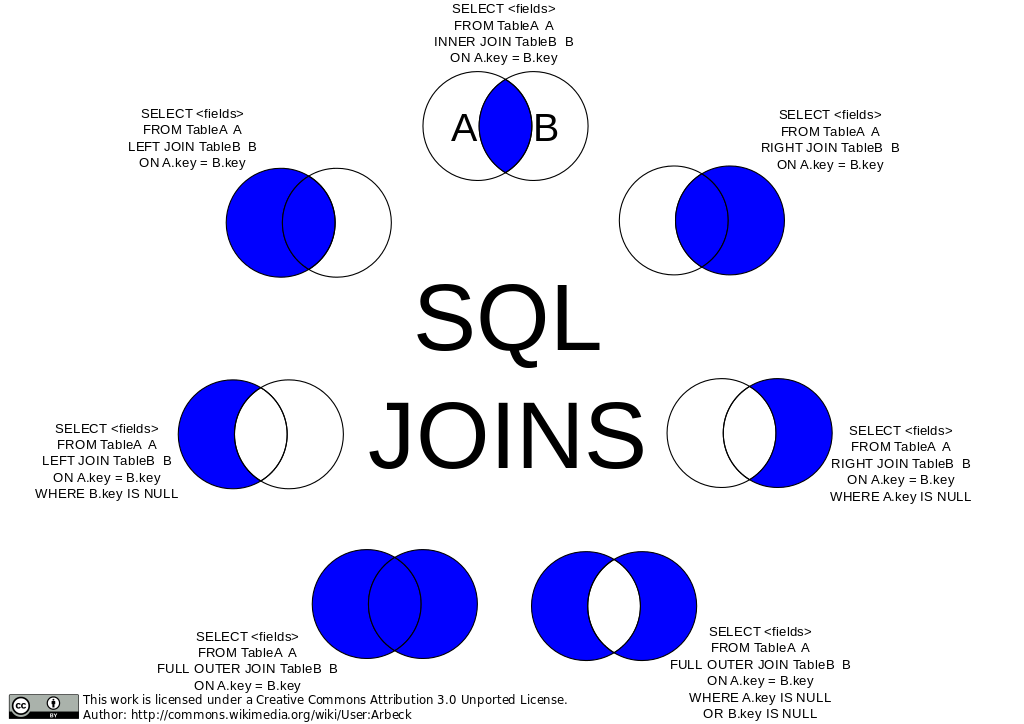

In [77]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/SQL_Joins.svg/1024px-SQL_Joins.svg.png')

In [78]:
contratos_modificada = contratos.merge(empresas
                                        ,left_on='fk_empresa_contratada' #chave utilizada pela tabela contratos
                                        ,right_on='id_empresa' #chave utilizada pela tabela empresas
                                        ,how='left' #left join para trazer todas as informacoes da tabela contratos e quando encontrar as chaves na tabela empresa trará o nome da empresa
                                        )
contratos_modificada

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada,id_empresa,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1,1,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2,2,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3,3,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4,4,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5,5,Imprensa Nacional
...,...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65,65,SESI-DF
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17,17,Central IT
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66,66,FORMA
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67,67,IG Elevadores


In [79]:
#removo informaçoes que nao serao utilizadas como id empresa e fk empresa contratada que sao duas colunas iguais
contratos_modificada.drop(columns=['id_empresa','fk_empresa_contratada'],inplace=True)


In [80]:
contratos_modificada.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional


In [81]:
#relacionar a tabela dos contratos com as datas de inicio 

contratos_final = contratos_modificada.merge(datas
                                        ,left_on='inicio_vigencia' #chave utilizada pela tabela contratos
                                        ,right_on='id_data' #chave utilizada pela tabela empresas
                                        ,how='left' #left join para trazer todas as informacoes da tabela contratos e quando encontrar as chaves na tabela empresa trará a data de inicio vigencia dos contratos 
                                        )
contratos_final

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa,id_data,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson,4,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City,13,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos,10,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A,6,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional,8,27/01/2015
...,...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,SESI-DF,208,24/07/2020
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,Central IT,209,27/07/2020
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,FORMA,212,19/08/2020
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,IG Elevadores,213,31/08/2020


In [82]:
#removo informaçoes que nao serao utilizadas como os ids de data vigencia agora que temos a data  
contratos_final.drop(columns=['inicio_vigencia','id_data'],inplace=True)
contratos_final

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,243,SESI-DF,24/07/2020
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,244,Central IT,27/07/2020
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,246,FORMA,19/08/2020
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,247,IG Elevadores,31/08/2020


In [83]:
#renomeio a coluna de data 
contratos_final.rename(columns={
                                'data':'data_inicio_vigencia'}
                                , inplace=True)

In [84]:
contratos_final.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data_inicio_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


In [85]:
#mesmo processo para trazer a informação de data fim vigencia
contratos_final_2 = contratos_final.merge(datas
                                        ,left_on='termino_vigencia' #chave utilizada pela tabela contratos
                                        ,right_on='id_data' #chave utilizada pela tabela empresas
                                        ,how='left' #left join para trazer todas as informacoes da tabela contratos e quando encontrar as chaves na tabela empresa trará a data de termino dos contratos 
                                        )
contratos_final_2.drop(columns=['termino_vigencia','id_data'],inplace=True)
contratos_final_2.rename(columns={'data':'data_termino_vigencia'},inplace=True)
contratos_final_2

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,24/07/2020,24/07/2021
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,27/07/2020,27/07/2021
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,19/08/2020,19/08/2021
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,31/08/2020,31/08/2021


In [86]:
#visualizar informações gerais das tabelas
contratos_final_2.count()

id_contrato              184
nome_contrato            184
objeto_contrato          184
valor_contrato           184
nome_empresa             184
data_inicio_vigencia     184
data_termino_vigencia    184
dtype: int64

In [87]:
#todas as colunas tem 184 registros isso demonstra que nao tem nenhum registro nulo

#tipos de dados
contratos_final_2.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [88]:
#datas estao como object/string e preciso transformar para o tipo data
contratos_final_2.data_termino_vigencia = pd.to_datetime(contratos_final_2.data_termino_vigencia, format='%d/%m/%Y').dt.date

ValueError: day is out of range for month

In [90]:
#esse erro esta indicando que em alguma das datas o dia do mes esta fora do periodo do respectivo mes, em funcao disso crio um for pra indentificar qual é esse registro que esta causando o erro 

In [89]:
for i in contratos_final_2.data_termino_vigencia:
    print(i)
    print(pd.to_datetime(i))

19/12/2015
2015-12-19 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
31/12/2015
2015-12-31 00:00:00
26/01/2016
2016-01-26 00:00:00
27/01/2016
2016-01-27 00:00:00
13/02/2016
2016-02-13 00:00:00
24/02/2016
2016-02-24 00:00:00
04/03/2016
2016-04-03 00:00:00
17/03/2016
2016-03-17 00:00:00
22/03/2016
2016-03-22 00:00:00
03/04/2016
2016-03-04 00:00:00
04/04/2016
2016-04-04 00:00:00
09/04/2016
2016-09-04 00:00:00
23/04/2016
2016-04-23 00:00:00
19/05/2016
2016-05-19 00:00:00
14/07/2016
2016-07-14 00:00:00
03/08/2016
2016-03-08 00:00:00
31/08/2016
2016-08-31 00:00:00
31/08/2016
2016-08-31 00:00:00
26/09/2016
2016-09-26 00:00:00
04/10/2016
2016-04-10 00:00:00
26/10/2016
2016-10-26 00:00:00
06/11/2016
2016-06-11 00:00:00
05/12/2016
2016-05-12 00:00:00
07/12/2016
2016-07-12 00:00:00
06/01/2017
2017-06-01 00:00:00
11/05/2017
2017-11-05 00:00:00
25/05/2017
2017-05-25 00:00:00
27/11/2017
2017-11-27 00:00:00
27/12/2017
2017-12-27 00:00:00
03/12/2016
2016-03-12 00:00:00
05/12/20

C:\Users\laura.nonato\AppData\Local\Temp\ipykernel_11088\3840590157.py:3: UserWarning: Parsing '19/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
C:\Users\laura.nonato\AppData\Local\Temp\ipykernel_11088\3840590157.py:3: UserWarning: Parsing '31/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
C:\Users\laura.nonato\AppData\Local\Temp\ipykernel_11088\3840590157.py:3: UserWarning: Parsing '26/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
C:\Users\laura.nonato\AppData\Local\Temp\ipykernel_11088\3840590157.py:3: UserWarning: Parsing '27/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  print(pd.to_datetime(i))
C:\Users\laura.nonato\AppData\Local\Temp\ipykernel_11088\3840590

ValueError: day is out of range for month

In [91]:
#parou em 31/09/2017 sendo que setembro vai ate dia 30 do mes. Entao preciso ajustar isso, utilizarei um replace como o campo de data ainda esta como string

contratos_final_2.data_termino_vigencia = contratos_final_2.data_termino_vigencia.str.replace('31/09/2017', '30/09/2017')

In [92]:
#rodo novamente o codigo que transforma o campo de dt termino vigencia de string para data
contratos_final_2.data_termino_vigencia = pd.to_datetime(contratos_final_2.data_termino_vigencia, 
                                                                format='%d/%m/%Y').dt.date

In [93]:
#mesma transformacao para dt inicio vigencia
contratos_final_2.data_inicio_vigencia = pd.to_datetime(contratos_final_2.data_inicio_vigencia, format='%d/%m/%Y').dt.date

In [94]:
contratos_final_2.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [95]:
#vou adicionar uma coluna que pode ser util aos usuarios finais da tabela que é o tempo de duracao do contrato
contratos_final_2['tempo_contrato'] = (contratos_final_2.data_termino_vigencia - contratos_final_2.data_inicio_vigencia).dt.days

In [96]:
contratos_final_2.head(100)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19,364
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31,308
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31,324
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31,364
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26,364
...,...,...,...,...,...,...,...,...
95,96,006/2018,Aquisição de solução de e-mail,61112.56,DATAPREV,2018-03-26,2019-03-26,365
96,97,002/2015,Prestação de serviço de locação em tempo integ...,313773.55,ABC Transportes,2018-04-04,2019-04-04,365
97,98,008/2014,Publicações Legais,25000.00,EBC,2018-04-04,2019-04-04,365
98,99,007/2018,Prestação pela ECT de Serviços e Vendas de Pro...,25000.00,ECT,2018-04-10,2019-04-10,365


In [98]:
#com essa coluna fica mais facil visualizar registros duplicados
contratos_final_2.nome_contrato.value_counts()

004/16           5
42064            5
006/2015         5
005/2015         5
005/2016         4
                ..
Disp. Lic. 24    1
Disp. Lic. 23    1
Disp. Lic. 22    1
Disp. Lic. 21    1
20/2020          1
Name: nome_contrato, Length: 122, dtype: int64

In [99]:
#alguns nomes de contrato aparece em ate 5 vezes, verifico essas contratos estao duplicados ou algo do tipo 
contratos_final_2[contratos_final_2.nome_contrato == '004/16']

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
49,50,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2016-05-01,2017-05-01,365
71,72,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2017-05-01,2018-05-01,365
99,100,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2019-05-01,0
123,124,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2020-05-01,366
167,168,004/16,Serviços de Telefonia Móvel (Celulares),62780.6,Claro S/A,2020-05-01,2021-05-01,365


In [ ]:
#ha contratos com datas de vigencia diferente nesse caso mas tambem contratos com inicio e fim no mesmo dia

In [100]:
contratos_final_2.tempo_contrato.value_counts()

 365     88
 366     45
 364     10
 1096     8
 730      2
 352      2
 731      2
 0        2
 749      2
 359      2
 750      2
 722      2
 1095     2
 729      2
 350      1
 531      1
 179      1
 182      1
-2        1
 340      1
 353      1
 363      1
 324      1
 339      1
 308      1
 394      1
 295      1
Name: tempo_contrato, dtype: int64

In [103]:
#vou apagar registros que podem ser "sujeira" do dataset, como os que tem periodo de contrato de menos de 1 dia
contratos_final_2 = contratos_final_2[contratos_final_2.tempo_contrato > 0]

In [104]:
#reseto os indices da tabela ja que exclui registros
contratos_final_2.reset_index(drop=True, inplace=True)

Etapa de carregamento dos dados

carregarei o arquivo tratado no google big query

In [108]:
#!pip install google-auth
#!pip install pandas-gbq

You should consider upgrading via the 'C:\Users\laura.nonato\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [109]:
from google.oauth2 import service_account

In [111]:
#crio um arquivo com as credenciais
credenciais = service_account.Credentials.from_service_account_file(filename='gbq.json', scopes =["https://www.googleapis.com/auth/cloud-platform"])

In [115]:
contratos_final_2.to_gbq(credentials=credenciais
                        ,destination_table='curso_etl.etl_csv'
                        ,if_exists='replace'
                        ,table_schema=[{'name': 'data_inicio_vigencia', 'type': 'DATE'},
                                               {'name': 'data_termino_vigencia', 'type': 'DATE'}])

100%|██████████| 1/1 [00:00<?, ?it/s]


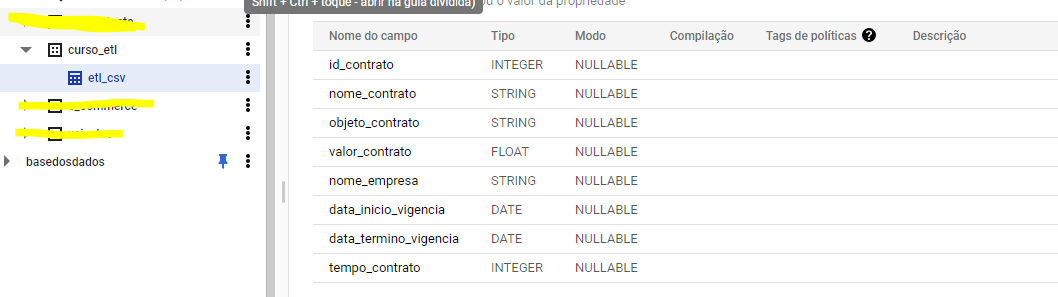

In [117]:
from PIL import Image
Image.open('tb final.png')

#print do arquivo apos a carga no banco de dados big query